In [1]:
#Using imageio  This works!  Not Verbose  More Clean Up

In [2]:
%matplotlib inline
import numpy as np
import scipy.misc as im
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import imageio
import pandas as pd
import datetime
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [3]:
def log(message, when=None):
    """Log a message with a timestamp.

    Args:
        message: Message to print.
        when: datetime of when the message occurred.
            Defaults to the present time.
    """
    when = datetime.datetime.now() if when is None else when
    print('%s: %s' % (when, message))

###################################################################

def read_file_data(source_dir):

    data_dir = source_dir
#    print("Getting Data")
    sub_dir = ["2S1", "BMP2", "BRDM_2", "BTR60", "BTR70", "D7", "T62", "T72", "ZIL131", "ZSU_23_4"]
    X = [] #Feature Data
    y = [] #Class Data
    input_dic = {}
    input_data_list = []

    for i in range(len(sub_dir)):
        tmp_dir = data_dir + sub_dir[i] + "/"
#        print("Subdirectory: " + tmp_dir)
        img_idx = [x for x in os.listdir(tmp_dir) if x.endswith(".jpeg")]
#        print("Class: " + sub_dir[i] + " Number of Files: " + str(len(img_idx)))
#        print()
        y += [i] * len(img_idx)
        input_dic = {'Directory': tmp_dir, 'Class': sub_dir[i]}
        for j in range(len(img_idx)):
            x = imageio.imread((tmp_dir + img_idx[j]))
            lx,ly = x.shape
            input_dic['Height'] = lx
            input_dic['Width'] = ly

            input_data_list.append(input_dic)
    df_data = pd.DataFrame(input_data_list)
    return df_data 

####################################################################################################

def read_image_data(data_dir,width,height, crop_size):
 
    sub_dir = ["2S1", "BMP2", "BRDM_2", "BTR60", "BTR70", "D7", "T62", "T72", "ZIL131", "ZSU_23_4"]
    X = []  #Features
    y = []  #Classes 

    for i in range(len(sub_dir)):
        tmp_dir = data_dir + sub_dir[i] + "/"
#        print("Subdirectory: " + tmp_dir)
        img_idx = [x for x in os.listdir(tmp_dir) if x.endswith(".jpeg")]
#        print("Class: " + sub_dir[i] + " Number of Files: " + str(len(img_idx)))
#        print()
        y += [i] * len(img_idx)
        for j in range(len(img_idx)):
            x = imageio.imread((tmp_dir + img_idx[j]))
            img = x
#            img = im.imresize(x, [height, width])
            img = img[(height - crop_size) // 2 : height - (height - crop_size) // 2, \
                    (width - crop_size) // 2: width - (width - crop_size) // 2]

            X.append(img)
            
    return X,y

#################################################################################################

def random_shuffle(np_feature_data, np_class_output):
    
    #Need to shuffle the data.  First reshape the data.  Combine features and class output in one array.  Shuffle and then
    #make and return  the input and output arrays
    
    #Reshape the feature data into an array of 1-D arrays (for each image) containg all the pixel elements (All the image data).
    
#    np_feature_data = np.reshape(np_feature_data, [np_feature_data[0], np_feature_data[1] * np_feature_data[2]])
    
    #numpy newaxis: The newaxis object can be used in all slicing operations to create an axis of length one.
    
    y_slice = np_class_output[:, np.newaxis]
    
    #Horizontaly stack the two arrays:
    
#    data = np.hstack([np_X_reshape, y_slice])

    data = np.hstack([np_feature_data, y_slice])
    
    #Randomly shuffle the data before training the neural network
    #Use numpy.random.shuffle
    #Multi-dimensional arrays are only shuffled along the first axis
    #Modify a sequence in-place by shuffling its contents.
    
    #Shuffle both training and test data
    
    np.random.shuffle(data)  #Shuffle
    
    #Divide the shuffled data into two arrays:  feature data and class data
    
    X_shuffled = data[:, :-1] # Get everything before the least element in the array. 
    y_shuffled = data[:, -1]  #Get only the last element of the data array.  This is the class output
    
    return X_shuffled, y_shuffled 
    
    
    
    
    


    

In [4]:
train_source_df= read_file_data(source_dir="MSTAR-10/train/" )
test_source_df= read_file_data(source_dir="MSTAR-10/test/" )

In [5]:
test_source_df.head()

,Class,Directory,Height,Width
0,2S1,MSTAR-10/test/2S1/,158,158
1,2S1,MSTAR-10/test/2S1/,158,158
2,2S1,MSTAR-10/test/2S1/,158,158
3,2S1,MSTAR-10/test/2S1/,158,158
4,2S1,MSTAR-10/test/2S1/,158,158


In [6]:
test_source_df.shape

(2425, 4)

In [7]:
test_source_df.tail()

,Class,Directory,Height,Width
2420,ZSU_23_4,MSTAR-10/test/ZSU_23_4/,158,158
2421,ZSU_23_4,MSTAR-10/test/ZSU_23_4/,158,158
2422,ZSU_23_4,MSTAR-10/test/ZSU_23_4/,158,158
2423,ZSU_23_4,MSTAR-10/test/ZSU_23_4/,158,158
2424,ZSU_23_4,MSTAR-10/test/ZSU_23_4/,158,158


In [8]:
train_source_df.head()

,Class,Directory,Height,Width
0,2S1,MSTAR-10/train/2S1/,158,158
1,2S1,MSTAR-10/train/2S1/,158,158
2,2S1,MSTAR-10/train/2S1/,158,158
3,2S1,MSTAR-10/train/2S1/,158,158
4,2S1,MSTAR-10/train/2S1/,158,158


In [9]:
train_source_df.tail()

,Class,Directory,Height,Width
2741,ZSU_23_4,MSTAR-10/train/ZSU_23_4/,158,158
2742,ZSU_23_4,MSTAR-10/train/ZSU_23_4/,158,158
2743,ZSU_23_4,MSTAR-10/train/ZSU_23_4/,158,158
2744,ZSU_23_4,MSTAR-10/train/ZSU_23_4/,158,158
2745,ZSU_23_4,MSTAR-10/train/ZSU_23_4/,158,158


In [10]:
train_source_df.shape

(2746, 4)

In [11]:
train_source_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2746 entries, 0 to 2745
Data columns (total 4 columns):
Class        2746 non-null object
Directory    2746 non-null object
Height       2746 non-null int64
Width        2746 non-null int64
dtypes: int64(2), object(2)
memory usage: 85.9+ KB


In [16]:
#Set image sizes for input
width=158
height=158 
crop_size=96
test_data_dir = "MSTAR-10/train/"
train_data_dir = "MSTAR-10/test/"

In [17]:
training_image_list, Class_training_list = read_image_data(train_data_dir, width, height, crop_size)
test_image_list, Class_test_list = read_image_data(test_data_dir, width, height, crop_size)

In [18]:
training_image_list

[Image([[38, 14, 13, ..., 20, 18, 29],
        [70, 43, 29, ..., 21, 13,  3],
        [30, 39, 22, ..., 33, 45, 40],
        ...,
        [30, 48, 21, ...,  7, 19, 14],
        [41, 40, 25, ..., 23, 33, 18],
        [36, 24, 22, ..., 37, 43, 23]], dtype=uint8),
 Image([[14,  1, 24, ..., 13,  9, 11],
        [13, 23, 10, ..., 24, 21, 11],
        [32, 33, 19, ..., 23, 20, 14],
        ...,
        [ 8, 20, 18, ...,  9, 11,  8],
        [ 5, 13, 13, ..., 18, 21, 15],
        [26, 20, 21, ...,  9, 14, 12]], dtype=uint8),
 Image([[12,  4, 11, ...,  6,  9, 21],
        [ 8,  1, 19, ..., 25, 28,  7],
        [17, 20, 12, ..., 46, 53, 31],
        ...,
        [18,  1,  5, ..., 20, 15, 32],
        [11, 12,  7, ..., 22,  8, 20],
        [23, 28, 15, ..., 11,  8,  5]], dtype=uint8),
 Image([[45, 29,  7, ..., 31,  4,  0],
        [39, 25, 21, ..., 18, 12, 11],
        [14, 33, 31, ..., 16, 13, 17],
        ...,
        [28, 27, 17, ..., 24, 21, 14],
        [21, 23, 16, ..., 31, 31, 15],
      

In [19]:
#Convert lists to numpy arrays.  #Turn these list of arrays into numpy arrays.  

In [20]:
np_X_train = np.asarray(training_image_list)
np_y_train = np.asarray(Class_training_list)

np_X_test = np.asarray(test_image_list)
np_y_test = np.asarray(Class_test_list)

In [22]:
np_y_train

array([0, 0, 0, ..., 9, 9, 9])

In [23]:
np_X_train.shape

(2425, 96, 96)

In [24]:
#Reshape the featue and class arrays
np_X_train = np.reshape(np_X_train, [np_X_train.shape[0], np_X_train.shape[1] * np_X_train.shape[2]])
np_X_test = np.reshape(np_X_test, [np_X_test.shape[0], np_X_test.shape[1] * np_X_test.shape[2]])

In [25]:
np_X_train.shape  #Start with this array for the training input

(2425, 9216)

In [26]:
X_train_shuffled, y_train_shuffled =  random_shuffle(np_X_train, np_y_train)
X_test_shuffled, y_test_shuffled =  random_shuffle(np_X_test, np_y_test)

In [27]:
####  Scale the data  ################

#Each integer input represents an 8-bit black and white pixel.  We need to keep the input between 0 and 1.
#Divide every integrer by (2**8 - 1) or 255.

X_train_shuffled_scaled = X_train_shuffled/255
X_test_shuffled_scaled = X_test_shuffled/255

In [28]:
##################################################################################################

# Center the training data

In [29]:
#To center the data (make it have zero mean and unit standard error),
#you subtract the mean and then divide the result by the standard deviation.

# x′=(x−μ)/σ

#You do that on the training set of data. But then you have to apply the same transformation to your 
#testing set (e.g. in cross-validation), or to newly obtained examples before forecast. 
#But you have to use the same two parameters μ and σ (values) that you used for centering the training set.

#Hence, every sklearn's transform's fit() just calculates the parameters (e.g. μ and σ in case of StandardScaler) 
#and saves them as an internal objects state. Afterwards, you can call its transform() method to apply the 
#transformation to a particular set of examples.

#fit_transform() joins these two steps and is used for the initial fitting of parameters on the training set x,
#but it also returns a transformed x′. Internally, it just calls first fit() and then transform() on the same data

#Note we have apriori knowledge that the different attributes are all on the same scale.  Accordingly, do not 
#divide each element by the variance

In [30]:
X_train_shuffled_scaled.mean(axis=0)
X_train_centered = X_train_shuffled_scaled - X_train_shuffled_scaled.mean(axis=0)
X_centered_test = X_test_shuffled_scaled - X_train_shuffled_scaled.mean(axis=0)

In [31]:
#Find d
#Page 215
#Find the number of dimensions to reduce down to by looking at the total number of dimensions that add up to 95% of the variance

pca = PCA()  
pca.fit(X_train_centered)  #First don't reduce any of the dimensions
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [39]:
cumsum

array([0.15276593, 0.23165207, 0.27965282, ..., 0.99999311, 1.        ,
       1.        ])

In [40]:
pca.explained_variance_ratio_

array([1.52765926e-01, 7.88861425e-02, 4.80007543e-02, ...,
       7.74407398e-05, 7.71373640e-05, 7.69276289e-05])

In [32]:
d

1284

In [34]:
pca = PCA(n_components = d)
x_pca_fit = pca.fit(X_train_centered)

X_Reduced_train_transform = x_pca_fit.transform(X_train_centered)
X_Reduced_test_transform = x_pca_fit.transform(X_centered_test )

 

In [35]:
#p101-104

In [36]:

classifier = KNeighborsClassifier(n_neighbors=10, weights="distance", algorithm="auto").fit(X_Reduced_train_transform,y_train_shuffled)

In [37]:
classifier.score(X_Reduced_test_transform, y_test_shuffled)

0.9512017479970867

In [38]:
y_predict = classifier.predict(X_Reduced_test_transform)
y_predict

array([2, 2, 4, ..., 3, 5, 1])

In [41]:
y_test_shuffled

array([2, 2, 4, ..., 3, 5, 1])

In [42]:
result=confusion_matrix(y_test_shuffled, y_predict )

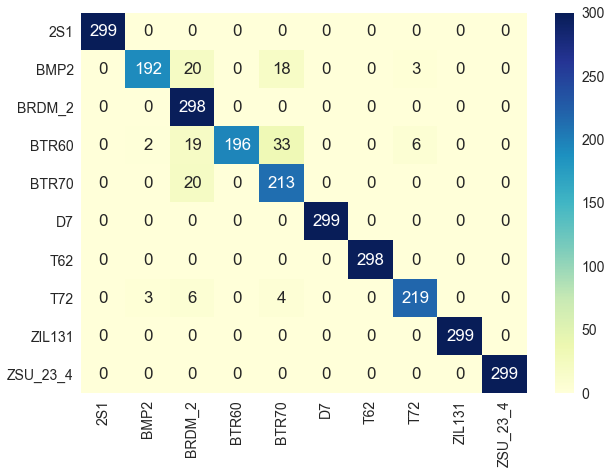

In [43]:

df_cm = pd.DataFrame(result, index = [i for i in  ["2S1", "BMP2", "BRDM_2", "BTR60", "BTR70", "D7", "T62", "T72", "ZIL131", "ZSU_23_4"]],
                  columns = [i for i in  ["2S1", "BMP2", "BRDM_2", "BTR60", "BTR70", "D7", "T62", "T72", "ZIL131", "ZSU_23_4"]])
sn.set(font_scale=1.4)

plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, vmin=0, vmax=300, fmt="d", cmap="YlGnBu")
fig1 = plt.gcf()
plt.show()
fig1.savefig('heat_map _2.jpeg')